In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dataset= pd.read_csv("C:\\Users\\HP\\Downloads\\Python ML\\Machine Learning A-Z Template Folder\\Part 2 - Regression\\Section 6 - Polynomial Regression\\Position_Salaries.csv")

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
dataset["Salary"].describe()

count         10.000000
mean      249500.000000
std       299373.883668
min        45000.000000
25%        65000.000000
50%       130000.000000
75%       275000.000000
max      1000000.000000
Name: Salary, dtype: float64

In [6]:
dataset["Salary"].min()

45000

In [7]:
dataset["Salary"].max()

1000000

In [8]:
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,-1].values

In [9]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [10]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [11]:
# Fitting linear regression to the dataset
from sklearn.linear_model import LinearRegression
lnr_reg= LinearRegression()
lnr_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=4)
X_poly= poly_reg.fit_transform(X)
lin_reg2= LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

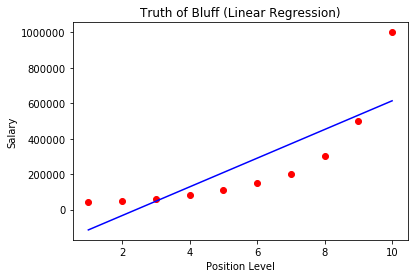

In [49]:
# Visualising Linear Regression result
plt.scatter(X,y,color='red')
plt.plot(X,lnr_reg.predict(X),color='blue')
plt.title('Truth of Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

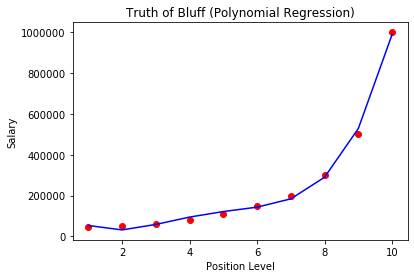

In [41]:
# Visuaising Polynomial regression result
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Truth of Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

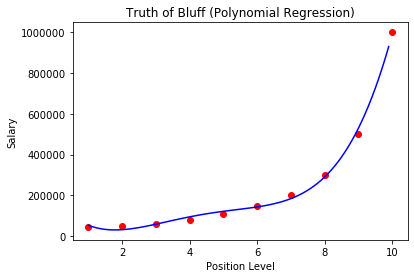

In [44]:
# Visuaising Polynomial regression  Accurate result
X_grid= np.arange(min(X),max(X),0.1)
X_grid= X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')
plt.title('Truth of Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [63]:
# Predicting a new result with linear regression
lnr_reg.predict(6.5)

ValueError: Expected 2D array, got scalar array instead:
array=6.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [62]:
# Predicting a new result with Polynomial regression
lin_reg2.predict(poly_reg.fit_transform(6.5))

ValueError: Expected 2D array, got scalar array instead:
array=6.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.